In [29]:
library(wooldridge)
library(dplyr)
library(stargazer)
library(estimatr)
library(broom)
library(texreg)
library(lubridate)
library(ggplot2)
library(tidyr)

# 大問1

### 1.

In [30]:
data("beauty")

# 回帰モデル1: コントロール変数なし
model1 <- lm(lwage ~ looks, data = beauty)

# 回帰モデル2: コントロール変数を追加 (人種と教育)
model2 <- lm(lwage ~ looks + black + educ, data = beauty)

# 回帰モデル3: さらにコントロール変数を追加 (性別)
model3 <- lm(lwage ~ looks + black + educ + female, data = beauty)

# HTML形式で保存
stargazer(model1, model2, model3, type = "html", out = "大問1-1.html")


<table style="text-align:center"><tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="3"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="3" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="3">lwage</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">looks</td><td>0.051<sup>**</sup></td><td>0.018</td><td>0.023</td></tr>
<tr><td style="text-align:left"></td><td>(0.024)</td><td>(0.024)</td><td>(0.021)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">black</td><td></td><td>-0.175<sup>***</sup></td><td>-0.059</td></tr>
<tr><td style="text-align:left"></td><td></td><td>(0.062)</td><td>(0.056)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td><

looksの係数は0.051であり, 有意水準5%で有意である.  
したがって, 外見が良ければ賃金に正の影響を与えるといえる.  

コントロール変数の追加によって係数は0に近づき, かつ有意でなくなった.

### 2.

In [31]:
# 回帰モデル1: コントロール変数なし
model1 <- lm(lwage ~ belavg + abvavg, data = beauty)

# 回帰モデル2: コントロール変数を追加 (人種と教育)
model2 <- lm(lwage ~ belavg + abvavg + black + educ, data = beauty)

# 回帰モデル3: さらにコントロール変数を追加 (経験)
model3 <- lm(lwage ~ belavg + abvavg + black + educ + female, data = beauty)

# HTML形式で保存
stargazer(model1, model2, model3, type = "html", out = "大問1-2.html")


<table style="text-align:center"><tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="3"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="3" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="3">lwage</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">belavg</td><td>-0.209<sup>***</sup></td><td>-0.187<sup>***</sup></td><td>-0.150<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.052)</td><td>(0.050)</td><td>(0.045)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">abvavg</td><td>-0.045</td><td>-0.085<sup>**</sup></td><td>-0.057<sup>*</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.037)</td><td>(0.036)</td><td>(0.032)</td></tr>
<t

belavgの係数は3つのモデル全てにおいて負であり, 有意水準1%で有意.  
abvavgの係数は0に近く, かつ有意性でない.  

したがって, 平均以下の外見は賃金に負の影響を与えるといえるが, 平均以上の外見が賃金に何かしらの影響を与えるかどうかは分からない.

### 3.

問1のモデルは全体的な外見評価の影響を捉えるのに対し, 問2のモデルは外見が特定のレベルで賃金にどのように影響するかを分析している.

問2のモデルにおいて, 平均以下の外見が賃金に負の影響を与えているということは, 相対的に良い外見である方が高賃金であると解釈できる.  
このことが問1におけるlooksの係数正かつ有意である理由と考えられる.

### 4.

In [32]:
# 高卒の定義
beauty$highschool <- ifelse(beauty$educ >= 12, 1, 0)

# 大卒の定義
beauty$college <- ifelse(beauty$educ >= 16, 1, 0)

# 高卒になる可能性のモデル（頑健な標準誤差を使用）
model_highschool <- lm_robust(highschool ~ belavg + abvavg + black + female , data = beauty, se_type = "HC0")

# 大卒になる可能性のモデル（頑健な標準誤差を使用）
model_college <- lm_robust(college ~ belavg + abvavg + black + female , data = beauty, se_type = "HC0")

# html出力(stargazerはlm_robustに非対応なので、htmlregパッケージを用いる)
htmlreg(list(model_highschool,
             model_college),
        file = "大問1-4.html",
        include.ci = FALSE,
        custom.model.names = c("高卒", "大卒")
        )

The table was written to the file '大問1-4.html'.




belavgに関しては, 高卒は-0.06, 大卒は-0.04で, どちらも有意水準5%で有意でない.  
abvavgに関しては, 高卒は0.11で有意水準0.01%で有意であるが, 大卒は0.06で有意水準5%で有意である.  

したがって, 平均以上の外見は高卒確率に大きく影響を与えているといえる.

# 大問2

### 1.

post: 1930年11月1日以降なら1, 以前なら0  
treat: 第6地区なら1, 第8地区なら0

$Y_{it} = \alpha + \beta_1 post_t + \beta_2 treat_i + \beta_3 (post_t × treat_i) + \epsilon_{it}$

### 2.

因果効果を識別するために必要な仮定：並行トレンドの仮定

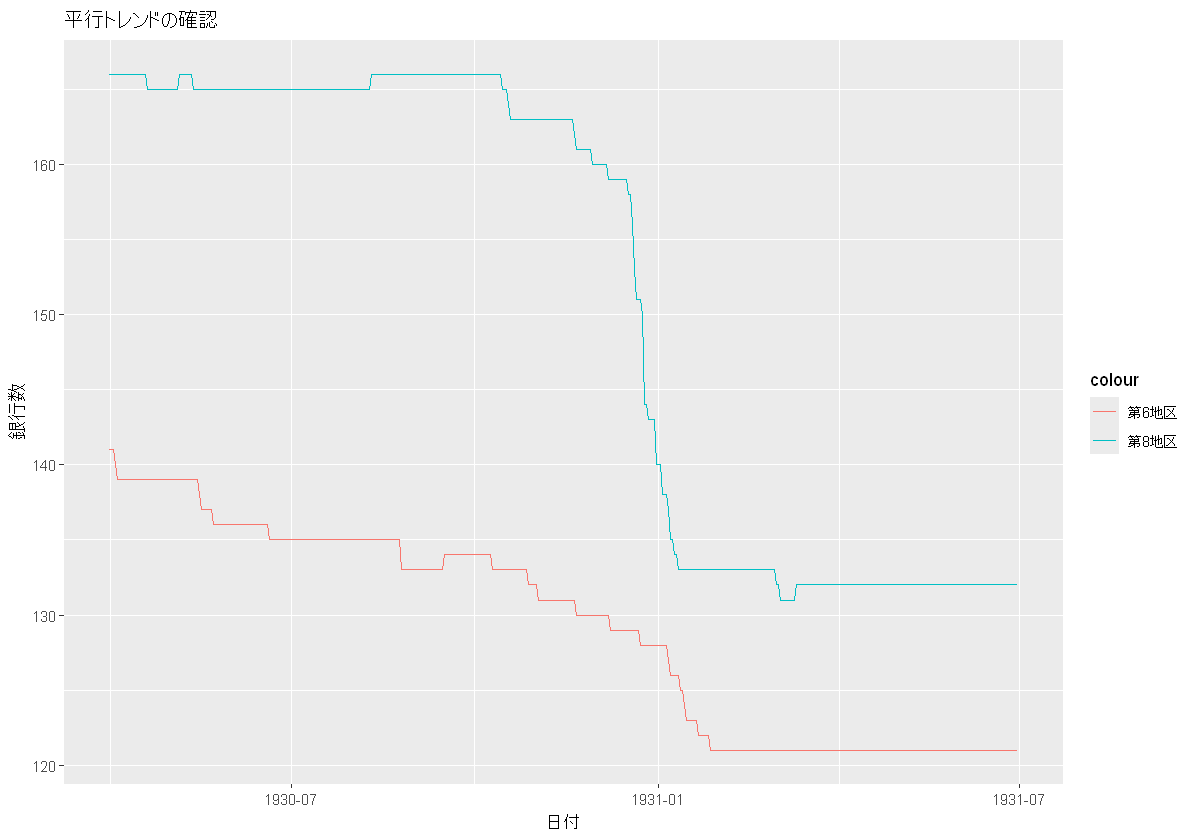

In [33]:
# データ読み込み
data <- read.csv("banks.csv")
# 日付変数の作成とフィルタリング
sample <- data %>%
  mutate(date = make_date(year, month, day)) %>%
  filter(date >= as.Date("1930-04-01") & date <= as.Date("1931-06-30"))

# 平行トレンドを確認するための図の作成

options(repr.plot.width=10, repr.plot.height=7)

ggplot(sample, aes(x = date)) +
  geom_line(aes(y = bib6, color = "第6地区")) +
  geom_line(aes(y = bib8, color = "第8地区")) +
  labs(title = "平行トレンドの確認", y = "銀行数", x = "日付")

### 3.

In [34]:
# 日付変数の作成とフィルタリング
sample <- data %>%
  mutate(date = make_date(year, month, day)) %>%
  filter(date >= as.Date("1930-04-01") & date <= as.Date("1931-06-30")) %>%
  mutate(period = ifelse(date < as.Date("1930-11-01"), "pre", "post"))

# 期間ごとの集計
banks_summary <- sample %>%
  group_by(period) %>%
  summarize(bib6_mean = mean(bib6, na.rm = TRUE), bib8_mean = mean(bib8, na.rm = TRUE))

# 結果の表示
print(banks_summary)

# A tibble: 2 × 3
  period bib6_mean bib8_mean
  <chr>      <dbl>     <dbl>
1 post        124.      139.
2 pre         136.      165.


### 4.

In [35]:
# DIDモデル
sample <- sample %>%
  pivot_longer(cols = starts_with("bib"), 
                names_to = "district", 
                values_to = "banks") %>%
  mutate(post = ifelse(date >= as.Date("1930-11-01"), 1, 0),
         treat = ifelse(district == "bib6", 1, 0),
         interaction = post * treat)

did_model <- lm(data = sample, banks ~ post + treat + interaction)

# 結果の表示
summary(did_model)

# stargazerを用いて結果をHTML形式で出力
stargazer(did_model, type = "html", out = "大問2-4.html", 
          title = "DIDモデルの結果",
          dep.var.labels = "銀行数",
          covariate.labels = c("post", "treat", "post x treat"))


Call:
lm(formula = banks ~ post + treat + interaction, data = sample)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9545 -2.6116 -0.5327  0.6963 24.0455 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 165.3037     0.4391  376.48   <2e-16 ***
post        -26.3492     0.6027  -43.72   <2e-16 ***
treat       -29.7710     0.6209  -47.95   <2e-16 ***
interaction  14.4281     0.8524   16.93   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.423 on 908 degrees of freedom
Multiple R-squared:  0.8464,	Adjusted R-squared:  0.8459 
F-statistic:  1668 on 3 and 908 DF,  p-value: < 2.2e-16



<table style="text-align:center"><caption><strong>DIDモデルの結果</strong></caption>
<tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="1" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td>銀行数</td></tr>
<tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">post</td><td>-26.349<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.603)</td></tr>
<tr><td style="text-align:left"></td><td></td></tr>
<tr><td style="text-align:left">treat</td><td>-29.771<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.621)</td></tr>
<tr><td style="text-align:left"></td><td></td></tr>
<tr><td style="text-align:left">post x treat</td><td>14.428<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.852)</td></tr>
<tr><td style="text-align:left"></td><td></td></

$\hat{\beta_1} = -26.3$ : 全体的な下降トレンド  
$\hat{\beta_2} = -29.7$ : 処置前の段階における第6地区と第8地区の平均銀行数の差  
$\hat{\beta_3} = 14.4$ : 中央銀行が民間銀行に貸し出すことによる平均銀行増加数  

すべて有意水準1%で有意である.  

これらの数値は問題3における表の結果を正しく示しているといえる.